# Project 1 - Healthcare Insurance Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Project Task - Week 1

    1. Collate the files so that all the information is in one place
    
    2. Check for missing values in the dataset
    
    3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain       significant information
    
    4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset
    
    5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the     data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.
    
    6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this     variable.
    
    7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.
    
    8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.
    
    9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.
    
    10. State how the distribution is different across gender and tiers of hospitals
    
    11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals
    
    12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities  and hospitals
    
    13. Test the following null hypotheses:
        a. The average hospitalization costs for the three types of hospitals are not significantly different.
        b. The average hospitalization costs for the three types of cities are not significantly different.
        c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.
        d. Smoking and heart issues are independent.


In [2]:
names = pd.read_excel('Names.xlsx')

In [3]:
medical = pd.read_csv('Medical Examinations.csv')

In [4]:
hospital = pd.read_csv('Hospitalisation details.csv')

In [5]:
names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [6]:
names.shape

(2335, 2)

In [7]:
medical.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [8]:
medical.shape

(2335, 8)

In [9]:
hospital.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [10]:
hospital.shape

(2343, 9)

In [11]:
merge1 = pd.merge(names,medical,on='Customer ID',how='inner')

In [12]:
merge1

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes
2,Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No
2332,Id2333,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No
2333,Id2334,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No


In [13]:
df = pd.merge(merge1,hospital,on='Customer ID',how='inner')

In [14]:
df

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2,Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
2332,Id2333,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
2333,Id2334,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013


In [15]:
df.isnull().sum()

Customer ID               0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
dtype: int64

In [16]:
df.shape

(2335, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   name                    2335 non-null   object 
 2   BMI                     2335 non-null   float64
 3   HBA1C                   2335 non-null   float64
 4   Heart Issues            2335 non-null   object 
 5   Any Transplants         2335 non-null   object 
 6   Cancer history          2335 non-null   object 
 7   NumberOfMajorSurgeries  2335 non-null   object 
 8   smoker                  2335 non-null   object 
 9   year                    2335 non-null   object 
 10  month                   2335 non-null   object 
 11  date                    2335 non-null   int64  
 12  children                2335 non-null   int64  
 13  charges                 2335 non-null   float64
 14  Hospital tier           2335 non-null   

In [18]:
df.dtypes

Customer ID                object
name                       object
BMI                       float64
HBA1C                     float64
Heart Issues               object
Any Transplants            object
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,BMI,HBA1C,date,children,charges
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,30.972649,6.578998,15.563597,1.025696,13529.918034
std,8.742095,2.228731,8.720508,1.234754,11898.654299
min,15.010000,4.000000,1.000000,0.000000,563.840000
25%,24.600000,4.900000,8.000000,0.000000,5084.010000
50%,30.400000,5.810000,15.000000,0.000000,9630.910000
75%,36.300000,7.955000,23.000000,2.000000,16912.295000
max,55.050000,12.000000,30.000000,5.000000,63770.430000


In [21]:
df.columns

Index(['Customer ID', 'name', 'BMI', 'HBA1C', 'Heart Issues',
       'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker',
       'year', 'month', 'date', 'children', 'charges', 'Hospital tier',
       'City tier', 'State ID'],
      dtype='object')

In [22]:
df.set_index('Customer ID',inplace=True)

In [23]:
df

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
Id2333,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013


In [24]:
df[df == '?'].any()

name                      False
BMI                       False
HBA1C                     False
Heart Issues              False
Any Transplants           False
Cancer history            False
NumberOfMajorSurgeries    False
smoker                     True
year                       True
month                      True
date                      False
children                  False
charges                   False
Hospital tier              True
City tier                  True
State ID                   True
dtype: bool

In [25]:
df.loc[df['smoker']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id560,"Pearlman, Mr. Oz",23.980,4.90,No,No,No,No major surgery,?,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013
Id635,"Bruns, Mr. Zachary T",25.175,4.96,No,yes,No,1,?,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015


In [26]:
df.loc[df['year']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id1286,"Ainsley, Ms. Katie M.",29.37,8.01,yes,No,No,1,No,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013
Id1289,"Levine, Ms. Annie J.",24.32,11.56,yes,No,No,1,No,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024


In [27]:
df.loc[df['month']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
Id2318,"Gagnon, Ms. Candice M",18.820,5.51,yes,No,No,No major surgery,No,1996,?,18,0,770.38,tier - 3,?,R1012
Id2322,"Street, Ms. Holly",21.380,8.01,No,No,No,No major surgery,No,2002,?,19,0,750.00,tier - 3,tier - 1,R1012


In [28]:
df.loc[df['Hospital tier']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id2324,"Duffy, Ms. Meghan K",22.24,5.04,No,No,No,No major surgery,No,1999,Dec,26,0,700.0,?,tier - 3,R1013


In [29]:
df.loc[df['City tier']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id2318,"Gagnon, Ms. Candice M",18.82,5.51,yes,No,No,No major surgery,No,1996,?,18,0,770.38,tier - 3,?,R1012


In [30]:
df.loc[df['State ID']=='?']

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
Customer ID,,,,,,,,,,,,,,,,
Id170,"Torphy, Mr. Bobby",37.620,6.32,yes,yes,No,2,yes,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?
Id1793,"Capriolo, Mr. Michael",18.905,4.91,yes,No,No,1,No,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?


These are the Customers ID values that contains trivial value ['Id560','Id635','Id1286','Id1289','Id3','Id2318','Id2322','Id2324','Id170','Id1793']

In [31]:
df1 = df.copy()

In [32]:
df.drop(['Id560','Id635','Id1286','Id1289','Id3','Id2318','Id2322','Id2324','Id170','Id1793'],inplace=True)

In [33]:
df.shape

(2325, 16)

In [34]:
df[df == '?'].any()

name                      False
BMI                       False
HBA1C                     False
Heart Issues              False
Any Transplants           False
Cancer history            False
NumberOfMajorSurgeries    False
smoker                    False
year                      False
month                     False
date                      False
children                  False
charges                   False
Hospital tier             False
City tier                 False
State ID                  False
dtype: bool

In [35]:
new_data = df.copy()

In [36]:
new_data.to_csv('Project 1 Sql.csv')

In [37]:
df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues               object
Any Transplants            object
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [38]:
df['Heart Issues'].unique()

array(['No', 'yes'], dtype=object)

In [39]:
df['Heart Issues'] = df['Heart Issues'].replace('No','0')
df['Heart Issues'] = df['Heart Issues'].replace('yes','1')


df['Heart Issues'] = df['Heart Issues'].astype(int)


df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants            object
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [40]:
df['Any Transplants'].unique()

array(['No', 'yes'], dtype=object)

In [41]:
df['Any Transplants'] = df['Any Transplants'].replace('No','0')
df['Any Transplants'] = df['Any Transplants'].replace('yes','1')


df['Any Transplants'] = df['Any Transplants'].astype(int)


df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants             int32
Cancer history             object
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [42]:
df['Cancer history'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['Cancer history'] = df['Cancer history'].replace('No','0')
df['Cancer history'] = df['Cancer history'].replace('Yes','1')


df['Cancer history'] = df['Cancer history'].astype(int)


df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants             int32
Cancer history              int32
NumberOfMajorSurgeries     object
smoker                     object
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [44]:
df['smoker'].unique()

array(['yes', 'No'], dtype=object)

In [45]:
df['smoker'] = df['smoker'].replace('No','0')
df['smoker'] = df['smoker'].replace('yes','1')


df['smoker'] = df['smoker'].astype(int)


df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants             int32
Cancer history              int32
NumberOfMajorSurgeries     object
smoker                      int32
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [46]:
df['NumberOfMajorSurgeries'].unique()

array(['No major surgery', '3', '1', '2'], dtype=object)

In [47]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery','0')


df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].astype(int)


df.dtypes

name                       object
BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants             int32
Cancer history              int32
NumberOfMajorSurgeries      int32
smoker                      int32
year                       object
month                      object
date                        int64
children                    int64
charges                   float64
Hospital tier              object
City tier                  object
State ID                   object
dtype: object

In [48]:
df['State ID'].unique()

array(['R1013', 'R1024', 'R1012', 'R1011', 'R1016', 'R1015', 'R1017',
       'R1014', 'R1023', 'R1019', 'R1018', 'R1026', 'R1022', 'R1021',
       'R1025', 'R1020'], dtype=object)

In [49]:
dum = pd.get_dummies(df['State ID'])

In [50]:
dum

,R1011,R1012,R1013,R1014,R1015,R1016,R1017,R1018,R1019,R1020,R1021,R1022,R1023,R1024,R1025,R1026
Customer ID,,,,,,,,,,,,,,,,
Id1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Id2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Id4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Id5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Id6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Id2332,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Id2333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
dum.drop(dum.columns[3:16],axis=1,inplace=True)

In [52]:
dum

,R1011,R1012,R1013
Customer ID,,,
Id1,0,0,1
Id2,0,0,1
Id4,0,0,0
Id5,0,1,0
Id6,1,0,0
...,...,...,...
Id2331,0,0,1
Id2332,0,0,1
Id2333,0,0,1


In [53]:
master_data = df.copy()

In [54]:
df = pd.concat([df,dum],axis=1)
df

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013
Customer ID,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,0,0,1
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,0,0,1
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,0,0,0
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,0,1,0
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,0,0,0,1,0,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,0,0,1
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,0,0,0,1,0,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,0,0,1
Id2333,"Albano, Ms. Julie",16.470,6.35,0,0,1,1,0,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,0,0,1


In [55]:
df['year'] = df['year'].astype(int)

In [56]:
df['Age'] = 2023 - df['year']
df

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013,Age
Customer ID,,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,0,0,1,55
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,0,0,1,46
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,0,0,0,32
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,0,1,0,34
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011,1,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,0,0,0,1,0,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,0,0,1,25
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,0,0,0,1,0,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,0,0,1,31
Id2333,"Albano, Ms. Julie",16.470,6.35,0,0,1,1,0,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,0,0,1,30


In [57]:
df['name'].str.contains('Mr.').sum()

1302

In [58]:
df['name'].str.contains('Mrs.').sum()

142

In [59]:
df['name'].str.contains('Ms.').sum()

1023

In [60]:
df['gender'] = df['name'].str.extract('(Mr.|Mrs.|Ms.)')

In [61]:
df['gender'].value_counts()

Mr.    1159
Ms.    1023
Mrs     142
Mro       1
Name: gender, dtype: int64

In [62]:
df['gender'] = df['gender'].replace('Mr.','Male')
df['gender'] = df['gender'].replace('Mro','Male')
df['gender'] = df['gender'].replace('Ms.','Female')
df['gender'] = df['gender'].replace('Mrs','Female')

In [63]:
df['gender'].value_counts()

Female    1165
Male      1160
Name: gender, dtype: int64

In [64]:
df.head()

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,...,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013,Age,gender
Customer ID,,,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,...,0,63770.43,tier - 1,tier - 3,R1013,0,0,1,55,Female
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,...,0,62592.87,tier - 2,tier - 3,R1013,0,0,1,46,Male
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,...,1,58571.07,tier - 1,tier - 3,R1024,0,0,0,32,Female
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,...,0,55135.40,tier - 1,tier - 2,R1012,0,1,0,34,Female
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,...,0,52590.83,tier - 1,tier - 3,R1011,1,0,0,61,Male


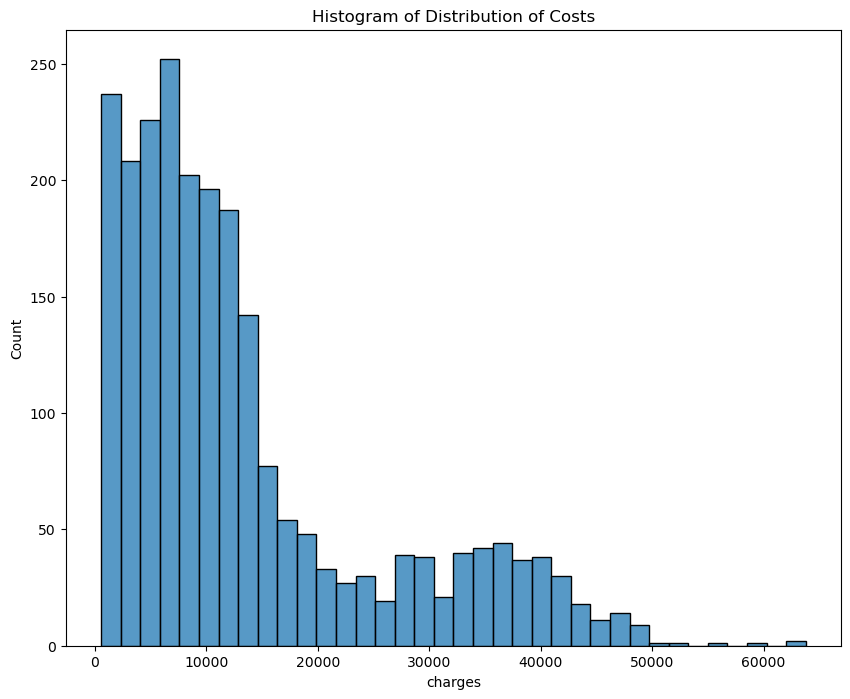

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(df['charges'])
plt.title('Histogram of Distribution of Costs')
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


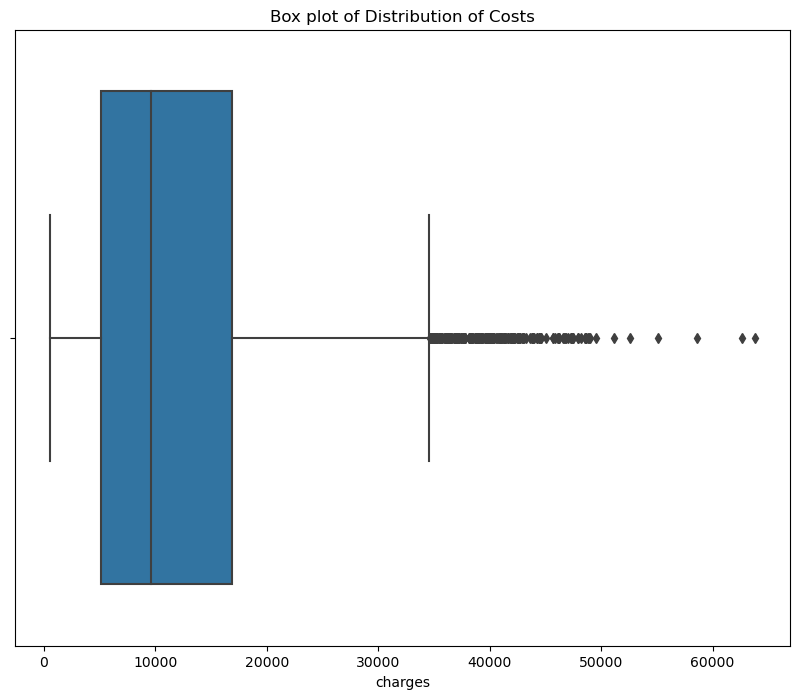

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(df['charges'])
plt.title('Box plot of Distribution of Costs')
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


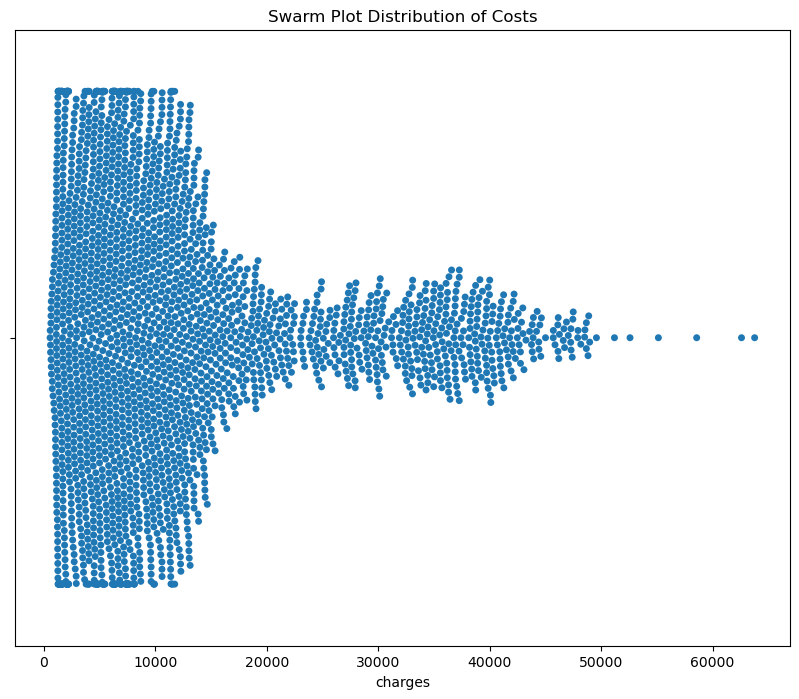

In [67]:
plt.figure(figsize=(10,8))
sns.swarmplot(df['charges'])
plt.title('Swarm Plot Distribution of Costs')
plt.show()

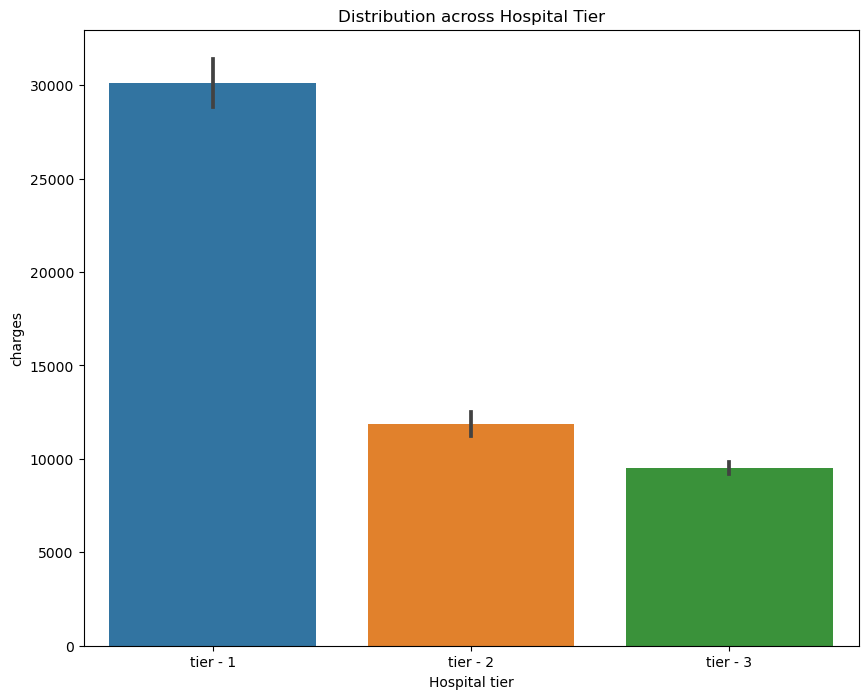

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Hospital tier'],y=df['charges'])
plt.title('Distribution across Hospital Tier')
plt.show()

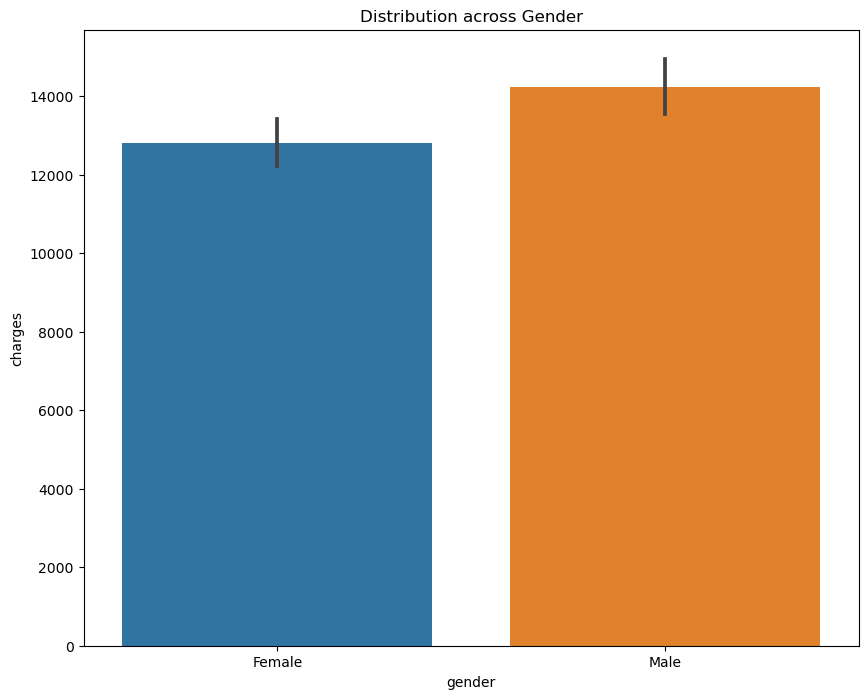

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['gender'],y=df['charges'])
plt.title('Distribution across Gender')
plt.show()

In [70]:
pd.DataFrame(df.groupby('Hospital tier')['charges'].median())

,charges
Hospital tier,
tier - 1,32097.435
tier - 2,7168.760
tier - 3,10676.830


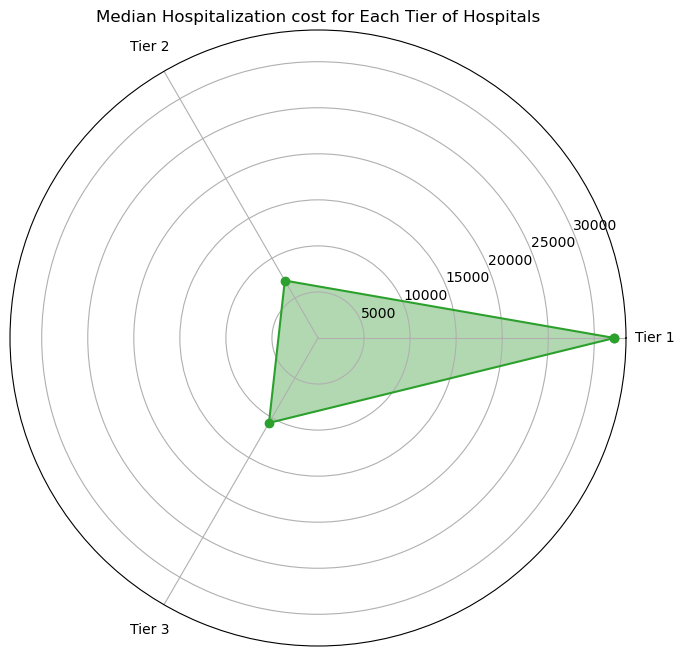

In [71]:
radar = pd.DataFrame({'Tier': ['Tier 1', 'Tier 2', 'Tier 3'],
                   'Median': [32192.760, 7201.700, 10646.625]})
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, polar=True)


theta = np.arange(len(radar) + 1) / float(len(radar)) * 2 * np.pi


values = radar['Median'].values
values = np.append(values, values[0])


l1, = ax.plot(theta, values, color='C2', marker='o')
plt.xticks(theta[:-1], radar['Tier'])
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.3)


plt.title('Median Hospitalization cost for Each Tier of Hospitals')
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


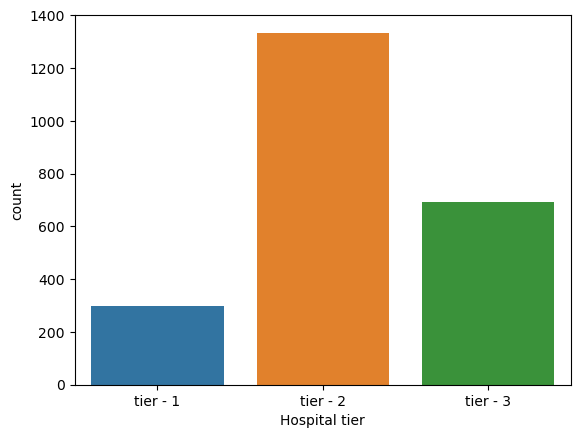

In [72]:
sns.countplot(df['Hospital tier'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


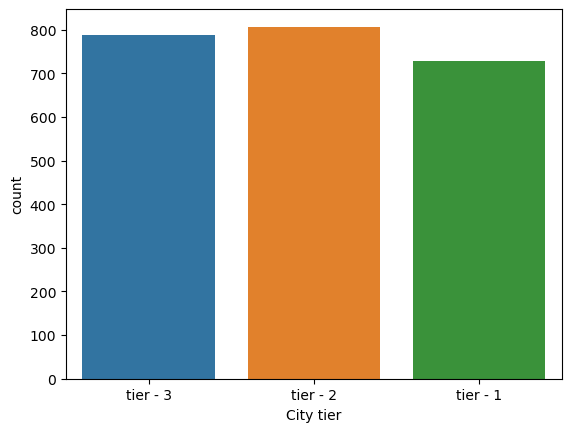

In [73]:
sns.countplot(df['City tier'])
plt.show()

In [74]:
df['Hospital tier'].value_counts()

tier - 2    1334
tier - 3     691
tier - 1     300
Name: Hospital tier, dtype: int64

In [75]:
freq_table = pd.crosstab(index=df['Hospital tier'],columns=df['City tier'])

In [76]:
freq_table

City tier,tier - 1,tier - 2,tier - 3
Hospital tier,,,
tier - 1,85,106,109
tier - 2,403,479,452
tier - 3,241,222,228


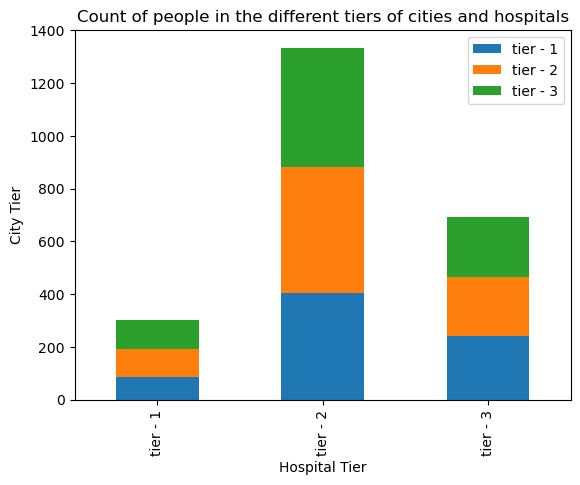

In [77]:
freq_table.plot(kind='bar',stacked=True)
plt.xlabel('Hospital Tier')
plt.ylabel('City Tier')
plt.title('Count of people in the different tiers of cities and hospitals')
plt.legend()
plt.show()

In [78]:
df

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,...,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013,Age,gender
Customer ID,,,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,...,0,63770.43,tier - 1,tier - 3,R1013,0,0,1,55,Female
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,...,0,62592.87,tier - 2,tier - 3,R1013,0,0,1,46,Male
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,...,1,58571.07,tier - 1,tier - 3,R1024,0,0,0,32,Female
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,...,0,55135.40,tier - 1,tier - 2,R1012,0,1,0,34,Female
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,...,0,52590.83,tier - 1,tier - 3,R1011,1,0,0,61,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,0,0,0,1,0,1998,Jul,...,0,637.26,tier - 3,tier - 3,R1013,0,0,1,25,Male
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,0,0,0,1,0,1992,Sep,...,0,604.54,tier - 3,tier - 3,R1013,0,0,1,31,Male
Id2333,"Albano, Ms. Julie",16.470,6.35,0,0,1,1,0,1993,Jun,...,0,600.00,tier - 2,tier - 1,R1013,0,0,1,30,Female


In [79]:
df.to_csv('project 1.csv')

In [80]:
pd.DataFrame(df.groupby('Hospital tier')['charges'].mean())

,charges
Hospital tier,
tier - 1,30131.995900
tier - 2,11875.883861
tier - 3,9487.456223


The average hospitalization costs for the three types of hospitals are different

In [81]:
pd.DataFrame(df.groupby(['Hospital tier','City tier'])['charges'].mean())

charges
Hospital tier City tier              
tier - 1      tier - 1   29160.756118
              tier - 2   29014.500472
              tier - 3   31976.123394
tier - 2      tier - 1   11515.412928
              tier - 2   11973.655344
              tier - 3   12093.665376
tier - 3      tier - 1    9812.839544
              tier - 2    9283.427477
              tier - 3    9342.179912

The average hospitalization costs for the three types of cities are different

In [82]:
pd.DataFrame(df.groupby('smoker')['charges'].mean())

,charges
smoker,
0,8409.199250
1,32866.960226


The average hospitalization cost for smokers is different from the average cost for nonsmokers

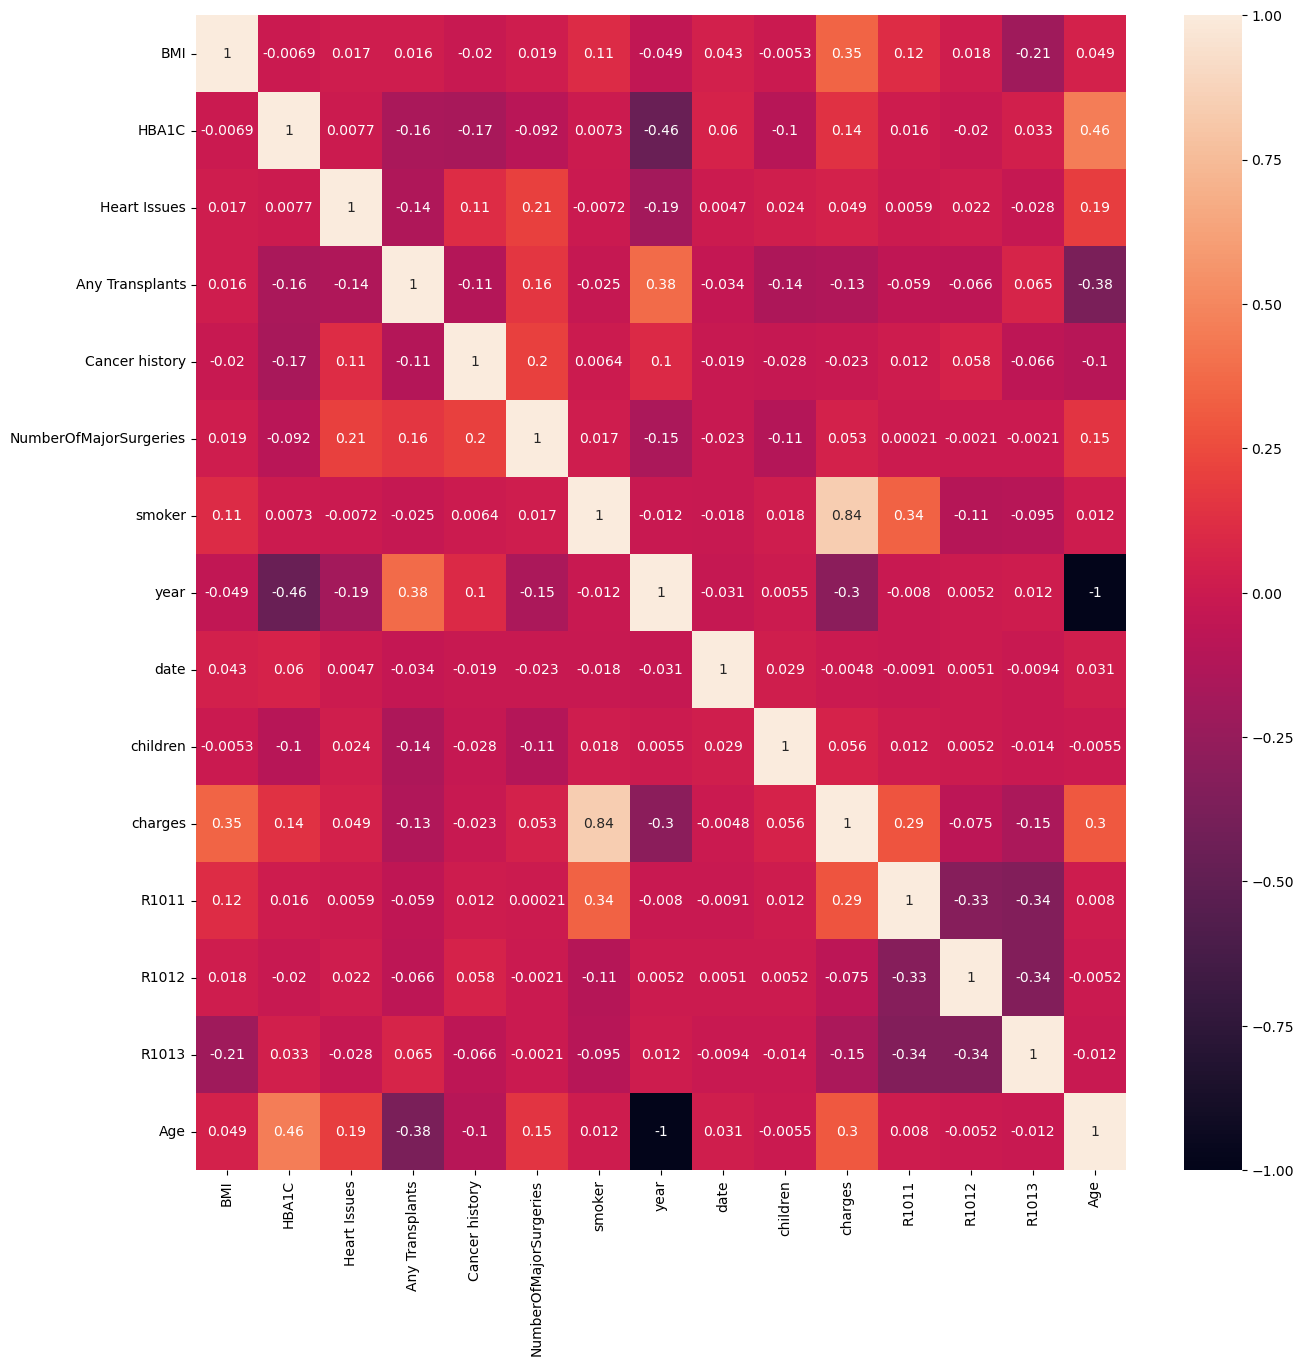

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the heatmap the correlation between Smoker and Heart Issues is -0.00072 that is 0.
So there is no correlation between these two variables and it is independent to each other

In [84]:
hypo_test = df[['Hospital tier','City tier','smoker','charges']]

In [85]:
hypo_test

,Hospital tier,City tier,smoker,charges
Customer ID,,,,
Id1,tier - 1,tier - 3,1,63770.43
Id2,tier - 2,tier - 3,1,62592.87
Id4,tier - 1,tier - 3,1,58571.07
Id5,tier - 1,tier - 2,1,55135.40
Id6,tier - 1,tier - 3,1,52590.83
...,...,...,...,...
Id2331,tier - 3,tier - 3,0,637.26
Id2332,tier - 3,tier - 3,0,604.54
Id2333,tier - 2,tier - 1,0,600.00


In [86]:
hypo_test = pd.get_dummies(hypo_test)

In [87]:
hypo_test

,smoker,charges,Hospital tier_tier - 1,Hospital tier_tier - 2,Hospital tier_tier - 3,City tier_tier - 1,City tier_tier - 2,City tier_tier - 3
Customer ID,,,,,,,,
Id1,1,63770.43,1,0,0,0,0,1
Id2,1,62592.87,0,1,0,0,0,1
Id4,1,58571.07,1,0,0,0,0,1
Id5,1,55135.40,1,0,0,0,1,0
Id6,1,52590.83,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
Id2331,0,637.26,0,0,1,0,0,1
Id2332,0,604.54,0,0,1,0,0,1
Id2333,0,600.00,0,1,0,1,0,0


In [88]:
X = hypo_test.drop('charges',axis=1)

In [89]:
X

,smoker,Hospital tier_tier - 1,Hospital tier_tier - 2,Hospital tier_tier - 3,City tier_tier - 1,City tier_tier - 2,City tier_tier - 3
Customer ID,,,,,,,
Id1,1,1,0,0,0,0,1
Id2,1,0,1,0,0,0,1
Id4,1,1,0,0,0,0,1
Id5,1,1,0,0,0,1,0
Id6,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...
Id2331,0,0,0,1,0,0,1
Id2332,0,0,0,1,0,0,1
Id2333,0,0,1,0,1,0,0


In [90]:
y = hypo_test['charges']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [93]:
from sklearn.feature_selection import f_regression

In [94]:
f_regression(X_train,y_train)

(array([4.52138923e+03, 7.42106378e+02, 4.39873200e+01, 1.00127099e+02,
        1.09672926e+01, 8.56831826e-02, 8.82332758e+00]),
 array([0.00000000e+000, 9.03140947e-138, 4.32045215e-011, 5.39588166e-023,
        9.45117930e-004, 7.69771237e-001, 3.01218016e-003]))

The p-value for Smoker - 0,
                Hospital Tier 1 - 9.03140947e-138,
                Hospital Tier 2 - 4.32045215e-011,
                Hospital Tier 3 - 5.39588166e-023,
                City Tier 1 - 9.45117930e-004,
                City Tier 2 - 7.69771237e-001,
                City Tier 3 - 3.01218016e-003
        
which is less than 0.05(p-value<0.05).
So we reject the Null Hypothesis for Hospital Tier

# Project Task - Week 2

1. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:
    
    Note: 
        • Perform the stratified 5-fold cross-validation technique for model building and validation
        • Use standardization and hyperparameter tuning effectively
        • Use sklearn-pipelines
        • Use appropriate regularization techniques to address the bias-variance trade-off
            a. Create five folds in the data, and introduce a variable to identify the folds
            b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the            remaining 20 percent is used to validate it in each iteration
            c. Develop five distinct models and five distinct validation scores (root mean squared error values)
            d. Determine the variable importance scores, and identify the redundant variables
            
3. Use random forest and extreme gradient boosting for cost prediction, share your cross-validation results, and calculate the variable importance scores

4. Case scenario:
    Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

5. Find the predicted hospitalization cost using all five models. The predicted value should be the mean of the five models' predicted values

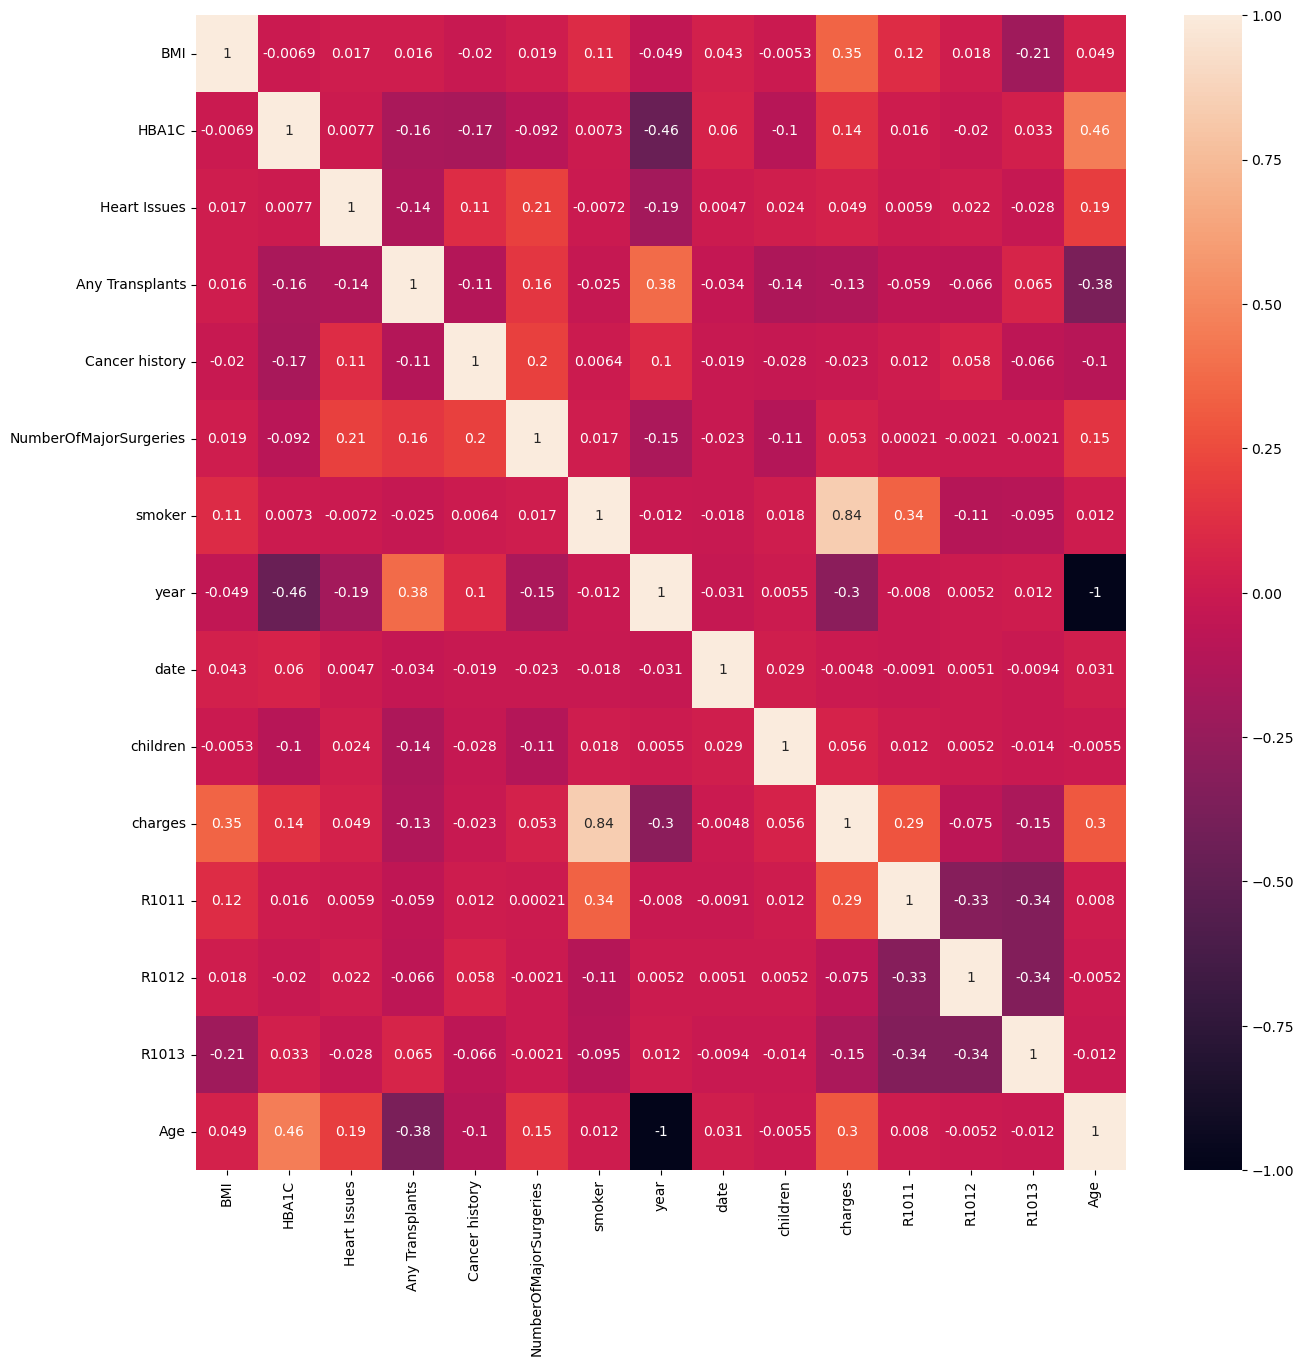

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the Heatmap Smoker and Charges are highly correlated

In [96]:
df

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,...,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013,Age,gender
Customer ID,,,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,...,0,63770.43,tier - 1,tier - 3,R1013,0,0,1,55,Female
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,...,0,62592.87,tier - 2,tier - 3,R1013,0,0,1,46,Male
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,...,1,58571.07,tier - 1,tier - 3,R1024,0,0,0,32,Female
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,...,0,55135.40,tier - 1,tier - 2,R1012,0,1,0,34,Female
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,...,0,52590.83,tier - 1,tier - 3,R1011,1,0,0,61,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,0,0,0,1,0,1998,Jul,...,0,637.26,tier - 3,tier - 3,R1013,0,0,1,25,Male
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,0,0,0,1,0,1992,Sep,...,0,604.54,tier - 3,tier - 3,R1013,0,0,1,31,Male
Id2333,"Albano, Ms. Julie",16.470,6.35,0,0,1,1,0,1993,Jun,...,0,600.00,tier - 2,tier - 1,R1013,0,0,1,30,Female


In [98]:
data = df.copy()

In [99]:
data

,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,...,children,charges,Hospital tier,City tier,State ID,R1011,R1012,R1013,Age,gender
Customer ID,,,,,,,,,,,,,,,,,,,,,
Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,0,0,1,1968,Oct,...,0,63770.43,tier - 1,tier - 3,R1013,0,0,1,55,Female
Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,0,0,1,1977,Jun,...,0,62592.87,tier - 2,tier - 3,R1013,0,0,1,46,Male
Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,0,0,0,1,1991,Jun,...,1,58571.07,tier - 1,tier - 3,R1024,0,0,0,32,Female
Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,0,0,1,1989,Jun,...,0,55135.40,tier - 1,tier - 2,R1012,0,1,0,34,Female
Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,0,0,1,1962,Aug,...,0,52590.83,tier - 1,tier - 3,R1011,1,0,0,61,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Id2331,"Brietzke, Mr. Jordan",22.340,5.57,0,0,0,1,0,1998,Jul,...,0,637.26,tier - 3,tier - 3,R1013,0,0,1,25,Male
Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,0,0,0,1,0,1992,Sep,...,0,604.54,tier - 3,tier - 3,R1013,0,0,1,31,Male
Id2333,"Albano, Ms. Julie",16.470,6.35,0,0,1,1,0,1993,Jun,...,0,600.00,tier - 2,tier - 1,R1013,0,0,1,30,Female


In [100]:
data.reset_index(inplace=True)

In [101]:
data.columns

Index(['Customer ID', 'name', 'BMI', 'HBA1C', 'Heart Issues',
       'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker',
       'year', 'month', 'date', 'children', 'charges', 'Hospital tier',
       'City tier', 'State ID', 'R1011', 'R1012', 'R1013', 'Age', 'gender'],
      dtype='object')

In [101]:
data = data.drop(['name','year', 'month', 'date', 'State ID','Customer ID'],axis=1)

In [102]:
data

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,charges,Hospital tier,City tier,R1011,R1012,R1013,Age,gender
0,47.410,7.47,0,0,0,0,1,0,63770.43,tier - 1,tier - 3,0,0,1,55,Female
1,30.360,5.77,0,0,0,0,1,0,62592.87,tier - 2,tier - 3,0,0,1,46,Male
2,38.095,6.05,0,0,0,0,1,1,58571.07,tier - 1,tier - 3,0,0,0,32,Female
3,35.530,5.45,0,0,0,0,1,0,55135.40,tier - 1,tier - 2,0,1,0,34,Female
4,32.800,6.59,0,0,0,0,1,0,52590.83,tier - 1,tier - 3,1,0,0,61,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,22.340,5.57,0,0,0,1,0,0,637.26,tier - 3,tier - 3,0,0,1,25,Male
2321,17.700,6.28,0,0,0,1,0,0,604.54,tier - 3,tier - 3,0,0,1,31,Male
2322,16.470,6.35,0,0,1,1,0,0,600.00,tier - 2,tier - 1,0,0,1,30,Female
2323,17.600,4.39,0,0,0,1,0,0,570.62,tier - 2,tier - 1,0,0,1,31,Male


In [145]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()

In [105]:
data['Hospital tier'] = le.fit_transform(data['Hospital tier'])
data['City tier'] = le.fit_transform(data['City tier'])
data['gender'] = le.fit_transform(data['gender'])

In [106]:
data

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,charges,Hospital tier,City tier,R1011,R1012,R1013,Age,gender
0,47.410,7.47,0,0,0,0,1,0,63770.43,0,2,0,0,1,55,0
1,30.360,5.77,0,0,0,0,1,0,62592.87,1,2,0,0,1,46,1
2,38.095,6.05,0,0,0,0,1,1,58571.07,0,2,0,0,0,32,0
3,35.530,5.45,0,0,0,0,1,0,55135.40,0,1,0,1,0,34,0
4,32.800,6.59,0,0,0,0,1,0,52590.83,0,2,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,22.340,5.57,0,0,0,1,0,0,637.26,2,2,0,0,1,25,1
2321,17.700,6.28,0,0,0,1,0,0,604.54,2,2,0,0,1,31,1
2322,16.470,6.35,0,0,1,1,0,0,600.00,1,0,0,0,1,30,0
2323,17.600,4.39,0,0,0,1,0,0,570.62,1,0,0,0,1,31,1


In [107]:
data.dtypes

BMI                       float64
HBA1C                     float64
Heart Issues                int32
Any Transplants             int32
Cancer history              int32
NumberOfMajorSurgeries      int32
smoker                      int32
children                    int64
charges                   float64
Hospital tier               int32
City tier                   int32
R1011                       uint8
R1012                       uint8
R1013                       uint8
Age                         int32
gender                      int32
dtype: object

In [108]:
from sklearn.model_selection import KFold

In [109]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_num = 0
for train_index, test_index in kf.split(data):
    data.loc[test_index, 'fold'] = fold_num
    fold_num += 1

In [125]:
data

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,charges,Hospital tier,City tier,R1011,R1012,R1013,Age,gender,fold
0,47.410,7.47,0,0,0,0,1,0,63770.43,0,2,0,0,1,55,0,3.0
1,30.360,5.77,0,0,0,0,1,0,62592.87,1,2,0,0,1,46,1,4.0
2,38.095,6.05,0,0,0,0,1,1,58571.07,0,2,0,0,0,32,0,1.0
3,35.530,5.45,0,0,0,0,1,0,55135.40,0,1,0,1,0,34,0,2.0
4,32.800,6.59,0,0,0,0,1,0,52590.83,0,2,1,0,0,61,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,22.340,5.57,0,0,0,1,0,0,637.26,2,2,0,0,1,25,1,2.0
2321,17.700,6.28,0,0,0,1,0,0,604.54,2,2,0,0,1,31,1,3.0
2322,16.470,6.35,0,0,1,1,0,0,600.00,1,0,0,0,1,30,0,1.0
2323,17.600,4.39,0,0,0,1,0,0,570.62,1,0,0,0,1,31,1,1.0


In [126]:
data.fold.value_counts()

3.0    465
4.0    465
1.0    465
2.0    465
0.0    465
Name: fold, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_var = np.zeros(len(data))


fold_num = 0
for train_index, test_index in kf.split(data):
    fold_var[test_index] = fold_num
    fold_num += 1


for fold in range(5):
    
    train_data = data[fold_var != fold]
    test_data = data[fold_var == fold]
    x_train, y_train = train_data.drop('charges', axis=1), train_data['charges']
    x_test, y_test = test_data.drop('charges', axis=1), test_data['charges']
    
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Fold {fold+1} RMSE: {rmse}")
    print('--------------------------------------------------------------------------------------------------------------')
    
    
    coef = model.coef_
    var_imp = abs(coef) / np.sum(abs(coef))
    print(f"Fold {fold+1} Variable Importance Scores: {var_imp}")
    print('--------------------------------------------------------------------------------------------------------------')
    
    
    redundant_vars = x_train.columns[var_imp < 0.1]
    print(f"Fold {fold+1} Redundant Variables: {redundant_vars}")
    print('-----------------------------------------------------------')

Fold 1 RMSE: 4611.611687922367
--------------------------------------------------------------------------------------------------------------
Fold 1 Variable Importance Scores: [1.13012323e-02 2.03828066e-03 9.06695088e-03 9.92211763e-03
 8.18822190e-03 4.89258925e-04 7.81234629e-01 1.42483226e-02
 6.16519002e-02 8.37164858e-03 2.93791134e-02 1.28012866e-02
 3.67628691e-02 9.03450378e-03 4.48929525e-03 1.02036952e-03]
--------------------------------------------------------------------------------------------------------------
Fold 1 Redundant Variables: Index(['BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'children', 'Hospital tier', 'City tier',
       'R1011', 'R1012', 'R1013', 'Age', 'gender', 'fold'],
      dtype='object')
-----------------------------------------------------------
Fold 2 RMSE: 4754.444655312291
--------------------------------------------------------------------------------------------------------------
Fold

# Random Forest 

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_var = np.zeros(len(data))


fold_num = 0
for train_index, test_index in kf.split(data):
    fold_var[test_index] = fold_num
    fold_num += 1


for fold in range(5):
    train_data = data[fold_var != fold]
    test_data = data[fold_var == fold]
    
    
    x_train, y_train = train_data.drop('charges', axis=1), train_data['charges']
    x_test, y_test = test_data.drop('charges', axis=1), test_data['charges']
    
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    
    
    y_pred = rf.predict(x_test)
    rmse_rf = np.sqrt(np.mean((y_pred - y_test)**2))
    
    
    print(f"Fold {fold+1} Random Forest RMSE: {rmse_rf}")
    print('--------------------------------------------------------------------------------------------------------------')
    
        
    var_imp_rf = rf.feature_importances_
    print(f"Fold {fold+1} Random Forest Variable Importance Scores: {var_imp_rf}")
    print('--------------------------------------------------------------------------------------------------------------')

NameError: name 'KFold' is not defined

# Extreme Gradient Boosting

In [131]:
import xgboost as xgb

In [134]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_var = np.zeros(len(data))


fold_num = 0
for train_index, test_index in kf.split(data):
    fold_var[test_index] = fold_num
    fold_num += 1


for fold in range(5):
    train_data = data[fold_var != fold]
    test_data = data[fold_var == fold]
    
    x_train, y_train = train_data.drop('charges', axis=1), train_data['charges']
    x_test, y_test = test_data.drop('charges', axis=1), test_data['charges'] # XGBoost Model
    
    
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(x_train, y_train)
    
    
    y_pred = xgb_model.predict(x_test)
    rmse_xgb = np.sqrt(np.mean((y_pred - y_test)**2))
    
    
    print(f"Fold {fold+1} XGBoost RMSE: {rmse_xgb}")
    print('--------------------------------------------------------------------------------------------------------------')
    
    
    var_imp_xgb = xgb_model.feature_importances_
    print(f"Fold {fold+1} XGBoost Variable Importance Scores: {var_imp_xgb}")
    print('--------------------------------------------------------------------------------------------------------------')

Fold 1 XGBoost RMSE: 3936.1873713204104
--------------------------------------------------------------------------------------------------------------
Fold 1 XGBoost Variable Importance Scores: [8.3757257e-03 1.6242140e-03 7.0062949e-04 9.6031197e-04 2.3240210e-03
 9.7629137e-04 9.3367231e-01 5.1872721e-03 1.1289973e-02 1.1303592e-03
 7.0247352e-03 1.3614267e-03 6.0801036e-03 1.5035150e-02 2.6463401e-03
 1.6110581e-03]
--------------------------------------------------------------------------------------------------------------
Fold 2 XGBoost RMSE: 3776.653937245996
--------------------------------------------------------------------------------------------------------------
Fold 2 XGBoost Variable Importance Scores: [9.9673830e-03 2.0464694e-03 7.4983941e-04 1.3561645e-03 1.5901846e-03
 1.9411473e-03 9.2143255e-01 4.6968861e-03 1.1310951e-02 1.3181042e-03
 7.9833400e-03 2.6200840e-03 7.9160547e-03 1.9858170e-02 3.1583058e-03
 2.0543735e-03]
--------------------------------------------

# Predicted Hospitalization cost using all five models

In [135]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_var = np.zeros(len(data))


fold_num = 0
for train_index, test_index in kf.split(data):
    fold_var[test_index] = fold_num
    fold_num += 1



all_preds = []
for fold in range(5):
    train_data = data[fold_var != fold]
    test_data = data[fold_var == fold]
    
    
    x_train, y_train = train_data.drop('charges', axis=1), train_data['charges']
    x_test, y_test = test_data.drop('charges', axis=1), test_data['charges']
    
    
    x_train = std.fit_transform(x_train)
    x_test = std.fit_transform(x_test)
    
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    
    
    y_pred_rf = rf.predict(x_test)
    all_preds.append(y_pred_rf)

In [136]:
mean_preds = np.mean(all_preds, axis=0)
print(f"Mean Predicted Hospitalization Cost: {mean_preds}")

Mean Predicted Hospitalization Cost: [42279.0914  43072.07086 47312.59366 47029.29886 43961.17878 43825.87966
 42224.92238 43808.8899  42203.52442 44005.33734 43135.93402 42742.66768
 42660.81464 40582.4306  40582.82944 41391.94914 40336.35936 41692.45258
 42654.97768 39896.6113  38319.92132 39705.9306  36941.00736 37458.19606
 39803.13638 39930.57928 39369.3009  38229.98776 38628.37128 40169.23908
 36394.25294 33396.4205  37077.57214 34734.48024 38261.62568 38316.56046
 37795.67894 38274.23114 36440.54162 35720.95128 33142.66842 36324.64142
 32658.354   28800.76904 37297.40818 33413.05794 33657.78874 35818.17122
 28363.1465  31492.56742 34420.86946 32650.48864 36036.6024  31144.72286
 28784.08058 31739.13988 30840.98742 27270.87552 29572.2076  29893.28414
 28554.63606 24067.55134 25136.66286 30589.27458 25570.55632 27154.29584
 23640.05694 24463.49582 27532.74362 26068.02166 24145.94378 24961.8192
 28465.89062 24256.63234 20037.86586 26891.08388 29548.74314 21356.14948
 19891.15966 22

# Case scenario:

In [137]:
import statsmodels.api as sm

In [139]:
data

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,charges,Hospital tier,City tier,R1011,R1012,R1013,Age,gender,fold
0,47.410,7.47,0,0,0,0,1,0,63770.43,0,2,0,0,1,55,0,3.0
1,30.360,5.77,0,0,0,0,1,0,62592.87,1,2,0,0,1,46,1,4.0
2,38.095,6.05,0,0,0,0,1,1,58571.07,0,2,0,0,0,32,0,1.0
3,35.530,5.45,0,0,0,0,1,0,55135.40,0,1,0,1,0,34,0,2.0
4,32.800,6.59,0,0,0,0,1,0,52590.83,0,2,1,0,0,61,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,22.340,5.57,0,0,0,1,0,0,637.26,2,2,0,0,1,25,1,2.0
2321,17.700,6.28,0,0,0,1,0,0,604.54,2,2,0,0,1,31,1,3.0
2322,16.470,6.35,0,0,1,1,0,0,600.00,1,0,0,0,1,30,0,1.0
2323,17.600,4.39,0,0,0,1,0,0,570.62,1,0,0,0,1,31,1,1.0


In [141]:
X = data.drop(['charges','fold'],axis=1)

In [142]:
X

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,Hospital tier,City tier,R1011,R1012,R1013,Age,gender
0,47.410,7.47,0,0,0,0,1,0,0,2,0,0,1,55,0
1,30.360,5.77,0,0,0,0,1,0,1,2,0,0,1,46,1
2,38.095,6.05,0,0,0,0,1,1,0,2,0,0,0,32,0
3,35.530,5.45,0,0,0,0,1,0,0,1,0,1,0,34,0
4,32.800,6.59,0,0,0,0,1,0,0,2,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,22.340,5.57,0,0,0,1,0,0,2,2,0,0,1,25,1
2321,17.700,6.28,0,0,0,1,0,0,2,2,0,0,1,31,1
2322,16.470,6.35,0,0,1,1,0,0,1,0,0,0,1,30,0
2323,17.600,4.39,0,0,0,1,0,0,1,0,0,0,1,31,1


In [143]:
y = data['charges']

In [144]:
y

0       63770.43
1       62592.87
2       58571.07
3       55135.40
4       52590.83
          ...   
2320      637.26
2321      604.54
2322      600.00
2323      570.62
2324      563.84
Name: charges, Length: 2325, dtype: float64

In [147]:
X = sm.add_constant(X)

In [148]:
X

,const,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,Hospital tier,City tier,R1011,R1012,R1013,Age,gender
0,1.0,47.410,7.47,0,0,0,0,1,0,0,2,0,0,1,55,0
1,1.0,30.360,5.77,0,0,0,0,1,0,1,2,0,0,1,46,1
2,1.0,38.095,6.05,0,0,0,0,1,1,0,2,0,0,0,32,0
3,1.0,35.530,5.45,0,0,0,0,1,0,0,1,0,1,0,34,0
4,1.0,32.800,6.59,0,0,0,0,1,0,0,2,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,1.0,22.340,5.57,0,0,0,1,0,0,2,2,0,0,1,25,1
2321,1.0,17.700,6.28,0,0,0,1,0,0,2,2,0,0,1,31,1
2322,1.0,16.470,6.35,0,0,1,1,0,0,1,0,0,0,1,30,0
2323,1.0,17.600,4.39,0,0,0,1,0,0,1,0,0,0,1,31,1


In [149]:
model = sm.OLS(y,X)

In [150]:
results = model.fit()

In [151]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     947.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:57:58   Log-Likelihood:                -22823.
No. Observations:                2325   AIC:                         4.568e+04
Df Residuals:                    2309   BIC:                         4.577e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -9770

#### From the above stats results the HBA1C, Heart Issues, Any Transplants, Cancer History, Number of Major Surgeries, City tier, R1012, gender, the p-value is greater than 0.05 (p-value > 0.05). So the columns are been dropped and the results are taken again

In [152]:
X = X.drop(['HBA1C','Heart Issues','Any Transplants','Cancer history','NumberOfMajorSurgeries','City tier','R1012','gender'],axis=1)

In [153]:
X

,const,BMI,smoker,children,Hospital tier,R1011,R1013,Age
0,1.0,47.410,1,0,0,0,1,55
1,1.0,30.360,1,0,1,0,1,46
2,1.0,38.095,1,1,0,0,0,32
3,1.0,35.530,1,0,0,0,0,34
4,1.0,32.800,1,0,0,1,0,61
...,...,...,...,...,...,...,...,...
2320,1.0,22.340,0,0,2,0,1,25
2321,1.0,17.700,0,0,2,0,1,31
2322,1.0,16.470,0,0,1,0,1,30
2323,1.0,17.600,0,0,1,0,1,31


In [154]:
model = sm.OLS(y,X)

In [155]:
results = model.fit()

In [156]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2027.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:00:26   Log-Likelihood:                -22827.
No. Observations:                2325   AIC:                         4.567e+04
Df Residuals:                    2317   BIC:                         4.572e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9504.1311    504.941    -18.822

#### From the above stats model no variable p-value has greater than 0.05. so we can say that our model is significant

In [157]:
case = pd.DataFrame({
    'BMI':[29.41],
    'HBA1C':[5.8],
    'Heart Issues':['no'],
    'Any Transplants':[0],
    'Cancer history':['yes'],
    'NumberOfMajorSurgeries':['No major surgery'],
    'smoker':['yes'],
    'children':[2],
    'Hospital tier':['tier - 1'],
    'City tier':['tier - 1'],
    'State ID':['R1011'],
    'Age':[35],
    'gender':['Female']
})

#### This is data given from the given case scenario

In [158]:
case

,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,children,Hospital tier,City tier,State ID,Age,gender
0,29.41,5.8,no,0,yes,No major surgery,yes,2,tier - 1,tier - 1,R1011,35,Female


from the given details from the questions we are taken the following required informations as follows

BMI - 29.41

Smoker - 1 (yes)

Children - 2

Hospital tier - 1 (tier 1)

R1011 - 1 (yes)

R1013 - 0 (no)

Age - 35

## By using the formula we are predicting the charges for the given condions:

#### Formula = (-9504.1311)+(319.80*BMI)+((2.237e+04)*Smoker)+(382.9369*Children)+(-1853.72*Hospital tier)+(-642.5927*R1011)+(-877.8975*R1013)+(263.3516*Age)

#### Formula = (-9504.1311)+(319.80*29.41)+((2.237e4)*1)+(382.9369*2)+(-1853.72*1)+(-642.5927*1)+(-877.8975*0)+(263.3516*35)

#### The 14232.1001 is the predicted charges for the case scenario. The Predicted charges is not accurate it may vary by giving some more relavent or dependent features.